<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [34]:
with open('out.dbpedia-similar', 'r') as file:
   out = file.read()
#print(out)
from collections import Counter
import numpy as np
import networkx as nx
import io
G = nx.Graph()
duplicate_edges = []
for line in io.StringIO(out):
    if not line.startswith('%'):
        # Parse and add edges to the graph
        nodes = list(map(int, line.split()))
        G.add_edge(nodes[0], nodes[1])

for line in out.split('\n'):
    if not line.startswith('%') and line.strip() != '':
        nodes = list(map(int, line.split()))
        edge = tuple(nodes)
        reverse_edge = tuple(reversed(nodes))

        if edge in G.edges or reverse_edge in G.edges:
            duplicate_edges.append(edge)
        else:
            G.add_edge(*edge)

print("Διπλότυπες ακμές:", duplicate_edges)

initial_node_count=G.number_of_nodes()
print(initial_node_count)
number_of_edges = G.number_of_edges()
print(number_of_edges)
degree_nodes= nx.average_degree_connectivity(G)
print(degree_nodes)
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(average_degree)
initial_connected_components=  list(nx.connected_components(G))
print(initial_connected_components)
print(len(initial_connected_components))

Διπλότυπες ακμές: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 46), (5, 47), (5, 48), (6, 32), (6, 46), (6, 47), (6, 48), (6, 49), (7, 8), (8, 9), (8, 10), (9, 168), (9, 184), (10, 185), (11, 12), (11, 13), (11, 14), (12, 14), (12, 15), (14, 16), (15, 113), (15, 161), (15, 162), (15, 163), (17, 18), (17, 19), (19, 20), (19, 21), (19, 22), (20, 21), (20, 23), (20, 24), (20, 25), (20, 26), (20, 27), (20, 28), (20, 29), (20, 30), (20, 31), (20, 32), (20, 33), (20, 34), (20, 35), (21, 22), (21, 30), (21, 31), (21, 32), (23, 24), (24, 34), (24, 35), (24, 36), (25, 35), (26, 37), (28, 32), (28, 38), (28, 39), (28, 40), (28, 41), (29, 68), (29, 89), (29, 90), (29, 100), (29, 101), (29, 102), (29, 104), (30, 74), (30, 157), (30, 158), (32, 42), (32, 54), (32, 147), (32, 251), (32, 312), (36, 147), (38, 41), (38, 73), (39, 74), (42, 43), (42, 44), (43, 44), (43, 45), (45, 154), (50, 51), (50, 52), (50, 53), (54, 55), (56, 57), (57, 58), (59, 60), (59, 61)

<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>



```
# **# Αυτό έχει τη μορφή κώδικα**
```

<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import random

adjacency_matrix = nx.to_numpy_array(G)
adjacency_matrix = nx.adjacency_matrix(G).todense()
#print(adjacency_matrix)
unconnected_pairs = []
for i in range(initial_node_count):
    for j in range(i+1, initial_node_count):
        if adjacency_matrix[i, j] == 0:
            unconnected_pairs.append((i+1, j+1))
print(f"Unconnected pairs: {len(unconnected_pairs)}\n")

print(f"The graph before processing: {G}")
print(f"Initial node count: {initial_node_count}")
print(f"Initial connected components: {len(initial_connected_components)}")

print(G)

removable_edges = []
for edge in G.edges():
    G.remove_edge(*edge)
    if len(list(nx.connected_components(G))) == len(initial_connected_components)  :
        removable_edges.append(edge)
    else:
      G.add_edge(*edge)

print("Edges that can be removed:", removable_edges)
print(f"The number of edges that can be removed: {len(removable_edges)}\n\n")

print(f"The graph after processing: {G}")
final_connected_components=list(nx.connected_components(G))
print(f"Final node count: {G.number_of_nodes()}")
average_degree = sum(dict(G.degree()).values()) /G.number_of_nodes()
print("Μέσος βαθμός κόμβων:", average_degree)
num_edges = G.number_of_edges()
print("Αριθμός ακμών:", num_edges)
print(f"Final connected components {len(final_connected_components)}")



Unconnected pairs: 91671

The graph before processing: Graph with 430 nodes and 565 edges
Initial node count: 430
Initial connected components: 95
Graph with 430 nodes and 565 edges
Edges that can be removed: [(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (5, 6), (5, 46), (5, 47), (32, 20), (32, 21), (32, 28), (168, 167), (168, 169), (11, 12), (15, 161), (15, 162), (113, 108), (161, 162), (19, 20), (19, 21), (20, 21), (20, 23), (20, 24), (20, 25), (20, 28), (20, 30), (20, 34), (28, 38), (28, 39), (29, 68), (29, 89), (29, 90), (29, 100), (29, 101), (30, 74), (68, 78), (68, 79), (68, 81), (68, 90), (68, 92), (68, 93), (68, 94), (68, 95), (68, 96), (68, 97), (68, 98), (68, 99), (68, 100), (89, 78), (89, 90), (89, 98), (90, 78), (90, 79), (42, 43), (62, 63), (78, 75), (78, 79), (78, 81), (78, 82), (78, 85), (79, 75), (79, 82), (79, 85), (75, 76), (75, 77), (75, 80), (76, 85), (105, 106), (105, 107), (105, 108), (105, 109), (105, 110), (105, 111), (106, 107), (106, 108), (107, 108), (119, 120), (

In [36]:
#dataframe of removable edges (they will function as positive samples)
import pandas as pd
print(len(removable_edges))
print(len(unconnected_pairs))
samples=removable_edges + unconnected_pairs
print(samples)

unconnected_df=pd.DataFrame(unconnected_pairs)

removables_df=pd.DataFrame(removable_edges)

data =  pd.DataFrame(samples)#  ,columns=['unconnected', 'removables'])



data['link'] = 1  #uncomment and complete

#dataframe of unconnected node pairs (they will function as negative samples)
data['link'] = 0 # uncomment and complete



#merge in one dataframe
link_labels = [0] * len(unconnected_pairs) + [1] * len(removable_edges)
data['link']=link_labels

print(data)




#link_labels.pop()

#build graph G'=G_reduced
G_reduced =G.copy()

print(f"Graph G_reduced statistics:\n{G_reduced}")
print(f"Number of nodes: {G_reduced.number_of_nodes()}")
print(f"Number of connected components: {len(list(nx.connected_components(G_reduced)))}")
print(f"The mean degree node is: {sum(dict(G_reduced.degree()).values()) / len(G_reduced)}")

230
91671
[(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (5, 6), (5, 46), (5, 47), (32, 20), (32, 21), (32, 28), (168, 167), (168, 169), (11, 12), (15, 161), (15, 162), (113, 108), (161, 162), (19, 20), (19, 21), (20, 21), (20, 23), (20, 24), (20, 25), (20, 28), (20, 30), (20, 34), (28, 38), (28, 39), (29, 68), (29, 89), (29, 90), (29, 100), (29, 101), (30, 74), (68, 78), (68, 79), (68, 81), (68, 90), (68, 92), (68, 93), (68, 94), (68, 95), (68, 96), (68, 97), (68, 98), (68, 99), (68, 100), (89, 78), (89, 90), (89, 98), (90, 78), (90, 79), (42, 43), (62, 63), (78, 75), (78, 79), (78, 81), (78, 82), (78, 85), (79, 75), (79, 82), (79, 85), (75, 76), (75, 77), (75, 80), (76, 85), (105, 106), (105, 107), (105, 108), (105, 109), (105, 110), (105, 111), (106, 107), (106, 108), (107, 108), (119, 120), (119, 121), (120, 121), (126, 127), (131, 132), (131, 133), (132, 133), (132, 134), (132, 137), (141, 142), (149, 150), (149, 151), (149, 152), (150, 151), (172, 173), (172, 174), (186, 187), (186, 18

<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li>
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

There are 91900 edges
These are the jaccard coeffient efficiency for each edge:
[(1, 2, 0.0), (1, 3, 0.0), (1, 4, 0.0), (1, 6, 0.0), (1, 7, 0.0), (1, 8, 0.0), (1, 9, 0.0), (1, 10, 0.0), (1, 11, 0.0), (1, 12, 0.0), (1, 13, 0.0), (1, 14, 0.0), (1, 15, 0.0), (1, 16, 0.0), (1, 17, 0.0), (1, 18, 0.0), (1, 19, 0.0), (1, 20, 0.0), (1, 21, 0.0), (1, 22, 0.0), (1, 23, 0.0), (1, 24, 0.0), (1, 25, 0.0), (1, 26, 0.0), (1, 27, 0.0), (1, 28, 0.0), (1, 29, 0.0), (1, 30, 0.0), (1, 31, 0.0), (1, 32, 0.0), (1, 33, 0.0), (1, 34, 0.0), (1, 35, 0.0), (1, 36, 0.0), (1, 37, 0.0), (1, 38, 0.0), (1, 39, 0.0), (1, 40, 0.0), (1, 41, 0.0), (1, 42, 0.0), (1, 43, 0.0), (1, 44, 0.0), (1, 45, 0.0), (1, 46, 0.0), (1, 47, 0.0), (1, 48, 0.5), (1, 49, 0.0), (1, 50, 0.0), (1, 51, 0.0), (1, 52, 0.0), (1, 53, 0.0), (1, 54, 0.0), (1, 55, 0.0), (1, 56, 0.0), (1, 57, 0.0), (1, 58, 0.0), (1, 59, 0.0), (1, 60, 0.0), (1, 61, 0.0), (1, 62, 0.0), (1, 63, 0.0), (1, 64, 0.0), (1, 65, 0.0), (1, 66, 0.0), (1, 67, 0.0), (1, 68, 0.0), (1

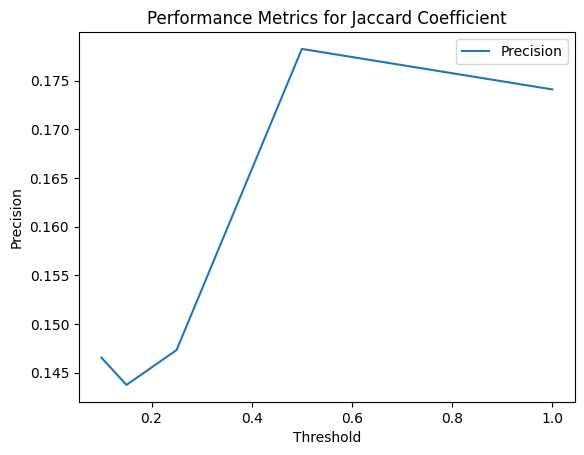

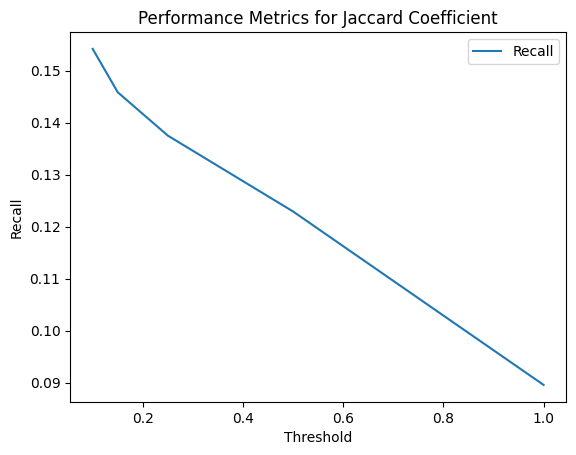

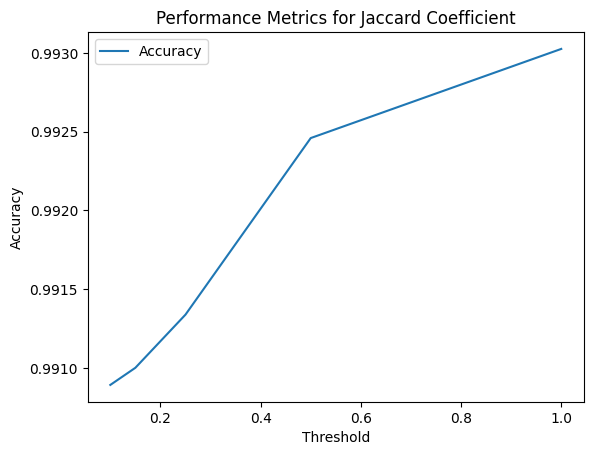

Graph with 430 nodes and 335 edges


In [53]:
def JCfunction(threshold_jc):
  thresholds = [0.1, 0.15, 0.25, 0.5, 1.0]
  print(f"\nThresholds:{thresholds}")
  #print(f"Threshold_jc list:\n{threshold_jc}")
  TP=0
  FP=0
  FN=0
  TN=0
  precisions = []
  recalls = []
  accuracies = []
  #print(threshold_jc)
  for threshold in thresholds:
    TP=0
    FP=0
    FN=0
    TN=0
    t=[]
    for u,v,j in threshold_jc:
      check=(u,v)
      if j>=threshold:
        if check in unconnected_pairs:
          FP+=1
        else:
          TP+=1
      else:
        if check in unconnected_pairs:
          TN+=1
        else:
          FN+=1

    #print(f"{TP},{TN},{FP},{FN}")

    precision_jc= TP / (TP + FP)
    recall_jc = TP / (TP + FN)
    accuracy_jc = (TP + TN) / (TP + TN + FP + FN)
    print(f"Sum TN+FP={TN+FP}")


    precisions.append(precision_jc)
    recalls.append(recall_jc)
    accuracies.append(accuracy_jc)
    t.append(threshold)

    print(f"\nthreshold:{threshold}\nrecall={recall_jc}\nprecision {precision_jc}\naccuracy {accuracy_jc}\n")
  plt.plot(thresholds, precisions, label='Precision')
  plt.xlabel('Threshold')
  plt.ylabel('Precision')
  plt.legend()
  plt.title('Performance Metrics for Jaccard Coefficient')
  plt.show()


  plt.plot(thresholds, recalls, label='Recall')
  plt.xlabel('Threshold')
  plt.ylabel('Recall')
  plt.legend()
  plt.title('Performance Metrics for Jaccard Coefficient')
  plt.show()

  plt.plot(thresholds, accuracies, label='Accuracy')
  plt.xlabel('Threshold')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Performance Metrics for Jaccard Coefficient')
  plt.show()


  return recall_jc, precision_jc, accuracy_jc;




jaccard=nx.jaccard_coefficient(G_reduced, ebunch=None)
jaccard_coefficients = list(nx.jaccard_coefficient(G_reduced))
print(f"There are {len(jaccard_coefficients)} edges")
print(f"These are the jaccard coeffient efficiency for each edge:\n{jaccard_coefficients}")
max=0
for jaccard_coefficient in jaccard_coefficients:
  if (jaccard_coefficient[2]>max):
    max=jaccard_coefficient[2]

jc_edges=[]
for jaccard_coefficient in jaccard_coefficients:
  if (jaccard_coefficient[2]==max):
    value=(jaccard_coefficient[0],jaccard_coefficient[1])
    jc_edges.append(jaccard_coefficient)

jaccard_coefficients_list=list(jc_edges)
print(f"\nThere are {len(jc_edges)} edges with the maximum jaccard coefficient efficiency ")
print(f"These are the edges with the maximum jaccard coefficient efficiency: \n{jaccard_coefficients_list}\n")

#am=03400232. That means am mod 10 =2. k=2
k=2
i=0
while(i<k):
  print(f"({jaccard_coefficients_list[i][0]},{jaccard_coefficients_list[i][1]}) -> {jaccard_coefficients_list[i][2]}")
  i+=1




print(f"length of unconnected pairs:{len(unconnected_pairs)}")
print(f"length of removable_edges: {len(removable_edges)}")
JCfunction(jaccard_coefficients)

non_edges = nx.non_edges(G_reduced)
print(G_reduced)





  #print(f"({u},{v}) -> {p}")

# k = Α.Μ. mod 10

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

In [5]:
#3i
#Αφού έχουμε τις τιμές των μετρικών για τους κόμβους του γράφου , μπορούμε να δημιουργήσουμε ένα νέο DataFrame, που θα περιέχει
#όλες τις τιμές των μετρικών Jaccard Coefficient, Preferential Attachment, Resource Allocation .
# Έπειτα, μπορούμε να χρησιμοποιήσουμε τη μέθοδο corr, dataframe.corr(), για να υπολογίσουμε τον πίνακα συσχέτισης ανάμεσα στις μετρικές.


#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
jaccard_coefficients = list(nx.jaccard_coefficient(G_reduced))
preferential_attachment=list(nx.preferential_attachment(G_reduced, ebunch=None))
resource_allocation=list(nx.resource_allocation_index(G_reduced, ebunch=None))



edges=[]
for j in jaccard_coefficients:
  value=(j[0],j[1])
  edges.append(value)




jacc_Coeff=[]
for j in jaccard_coefficients:
  jacc_Coeff.append(j[2])


Pr_Attachment=[]
for pa in preferential_attachment:
  Pr_Attachment.append(pa[2])

Resource_Allocation=[]
for ra in resource_allocation:
  Resource_Allocation.append(ra[2])

#print(len(link_labels))
link_labels.pop()
data = {'Edges': edges,
        'link': link_labels,
        'Jacc.Coeff': jacc_Coeff,
        'Pr.Attachment':Pr_Attachment,
        'resource_allocation':Resource_Allocation}

dataframe = pd.DataFrame(data)

print(edges)
dataframe.set_index('Edges', inplace=True)

print(dataframe)



[(1, 2), (1, 3), (1, 4), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 72), (1, 73), (1, 74), (1, 75), (1, 76), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (1, 100), (1, 101), (1, 102), (1, 103), (1, 104), (1, 105), (1, 106), (1, 107), (1, 108), (1, 109), (1, 110), (1, 111), (1, 112), (1,

In [ ]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient

#Preferential Attachment

#Resource Allocation

<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [6]:
#uncomment whole cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X = dataframe.drop(columns=['link'])           #features, uncomment and complete
y = dataframe['link'] #target, uncomment and complete


X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 0) #uncomment and complete

In [7]:
#uncomment whole cell
classifier = RandomForestClassifier()

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
model = GridSearchCV(classifier, param_grid = parameters)

In [8]:
model.fit(X_train_scaled,y_train )#train the model, uncomment and complete


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [9]:
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,predictions)
print("Ακρίβεια:", accuracy)
predictions[:2] #get (A.M. last digit) first predictions, uncomment and complete
#for i in range(0,3):
  #print(predictions[i])

Ακρίβεια: 0.9976060935799782


array([0, 0])

In [10]:
i=0
for edge in edges:
  i+=1
  if edge==(1,47):
    counter=i
print(counter)
predict_proba = model.predict_proba([[jacc_Coeff[counter],Pr_Attachment[counter],Resource_Allocation[counter]]]) #uncomment and complete
print(predict_proba)


45
[[1. 0.]]


<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων:
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [11]:
#install node2vec with conda / pip
!pip install node2vec
from node2vec import Node2Vec   #uncomment
import multiprocessing

p=1
q=1
dimensions=128
num_walks=10
walk_length=80
window_size=10
workers=multiprocessing.cpu_count()

#generate walks
node2vec_walker = Node2Vec(G_reduced, dimensions=128, walk_length=80, num_walks=10, workers=multiprocessing.cpu_count()) #uncomment and complete

#train node2vec model
n2v_model = node2vec_walker.fit(window=window_size , min_count=1) #uncomment and complete

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [12]:
print(dataframe)

x =dataframe.drop('link', axis=1)
y=dataframe['link']

            link  Jacc.Coeff  Pr.Attachment  resource_allocation
Edges                                                           
(1, 2)         0         0.0              1                  0.0
(1, 3)         0         0.0              2                  0.0
(1, 4)         0         0.0              1                  0.0
(1, 6)         0         0.0              7                  0.0
(1, 7)         0         0.0              1                  0.0
...          ...         ...            ...                  ...
(426, 430)     1         0.0              1                  0.0
(427, 428)     1         0.0              2                  0.0
(427, 429)     1         0.0              1                  0.0
(427, 430)     1         0.0              1                  0.0
(429, 430)     1         1.0              1                  0.5

[91900 rows x 4 columns]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)  #uncomment and complete

In [14]:
#uncomment whole cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train,y_train)   #uncomment and complete
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9976060935799782


<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>